📌 Objetivo: O aluno deverá criar um dataset, manipular os dados, extrair características estatísticas, apresentar visualizações gráficas e implementar um modelo de LDA para classificação.

📌 Valor: 0 a 10 pontos

📌 Habilidades envolvidas:

* Manipulação e criação de datasets
* Estatística descritiva
* Visualização de dados (Seaborn e Matplotlib)
* Implementação de um modelo de Machine Learning (LDA)
* Análise de resultados

**Entrega e Formato**
O aluno deve entregar **um arquivo Jupyter Notebook (.ipynb)** com o código organizado e comentado.
Deve haver uma explicação textual de cada etapa do processo.

📌 Pontuação final (0 a 10 pontos)

* 3 pontos: Criação e manipulação de dados.
* 3 pontos: Estatística descritiva e visualização.
* 4 pontos: Implementação do modelo LDA.

In [1]:
#@title Coloque os nomes e RM's dos integrantes aqui!
#RM560485 - Cleyton Enrike de Oliveira
#RM560442 - Matheus Henrique Nascimento de Freitas
#RM561178 - Pedro Henrique de Souza Sena


**Parte 1: Criação e Manipulação do Dataset (3 pontos)**

O aluno deve criar um dataset sintético com pelo menos 200 amostras e 4 variáveis numéricas independentes (features) mais 1 variável categórica (classe) com pelo menos 3 categorias.

Deve utilizar Pandas e NumPy para criar e manipular os dados.
O dataset deve ser salvo em um arquivo CSV.

✅ Critérios de avaliação:

(1.0) Criou um dataset com a estrutura correta.

(1.0) Utilizou Pandas e NumPy corretamente.

(1.0) Salvou e carregou o dataset no formato CSV corretamente.

In [3]:
import sys
print(sys.executable)


C:\Users\pedro\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe


In [1]:
#@title Responda Aqui

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

dataset = pd.read_csv("filme.csv", sep=",")

dataset.head()

## variaveis numericas - id, ano, nota, tempo em min
## categorica - genero

ModuleNotFoundError: No module named 'numpy'

**Parte 2: Estatística Descritiva e Visualização de Dados (3 pontos)**

O aluno deve calcular as estatísticas descritivas das variáveis numéricas do dataset, incluindo:
Média, mediana, desvio padrão, quartis, valores máximos e mínimos.
Criar pelo menos três gráficos diferentes utilizando Seaborn e Matplotlib para visualizar os dados:
* Histograma ou Boxplot para distribuição dos dados.
* Gráfico de dispersão (scatter plot) entre duas variáveis.
* Mapa de calor (heatmap) para visualizar a correlação entre as variáveis.

✅ Critérios de avaliação:

(1.0) Estatísticas descritivas corretas e bem interpretadas.

(1.0) Gráficos bem construídos e interpretados.

(1.0) Uso correto do Seaborn e Matplotlib.

count    153.000000
mean       6.477124
std        2.345446
min        2.000000
25%        5.000000
50%        7.000000
75%        8.000000
max       10.000000
Name: nota, dtype: float64
Desvio Padrão: 2.3454462242942324


<Axes: xlabel='nota'>

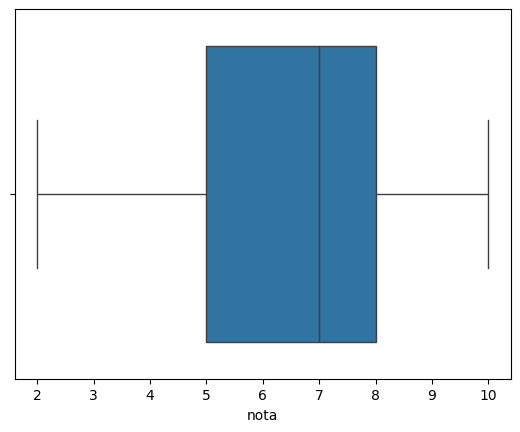

In [9]:
#@title Responda Aqui   

dataset2 = dataset['nota'].describe() ## 1. exibe a média, 2. Mediana, 3. Mínimo, 4. Quartil (25, 50, 75), 5. Máximo
print(dataset2)

print("Desvio Padrão:",dataset['nota'].std()) ## calculando o desvio padrão

## gráficos
sns.boxplot(dataset['nota'], orient='h')


In [10]:
print(dataset.dtypes)

filmeId           int64
titulo           object
ano               int64
nota              int64
tempo_minutos     int64
generos          object
dtype: object


In [21]:
dataset['generos'].unique()
genero = dataset['generos'].value_counts()


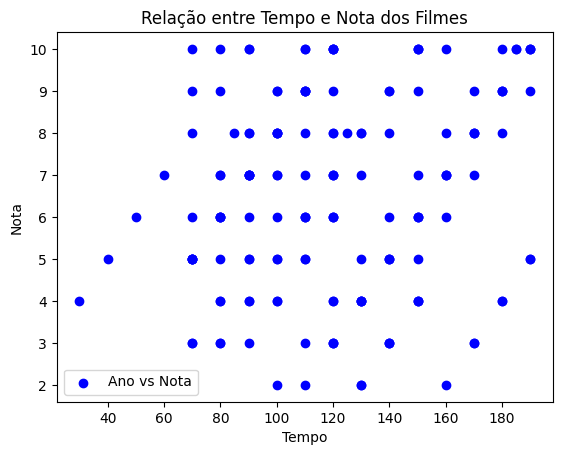

In [31]:
import matplotlib.pyplot as plt

# Gerando o gráfico de dispersão entre ano e nota
plt.scatter(dataset['tempo_minutos'], dataset['nota'], color='blue', label="Ano vs Nota")

# Ajustando o gráfico
plt.xlabel('Tempo')
plt.ylabel('Nota')
plt.title('Relação entre Tempo e Nota dos Filmes')
plt.legend()
plt.show()


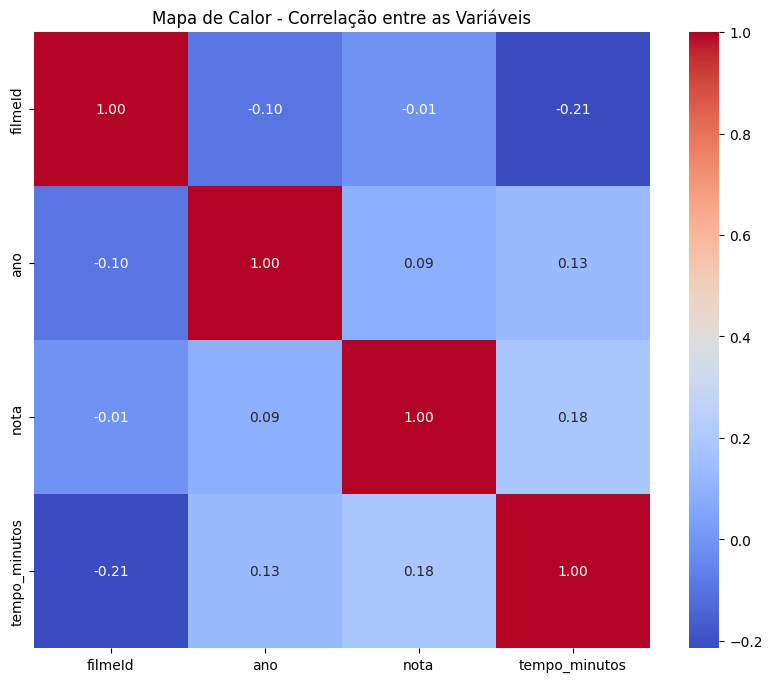

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

# Selecionando apenas as colunas numéricas
dataset_numerico = dataset.select_dtypes(include=['float64', 'int64'])

# Calculando a correlação entre as variáveis numéricas
correlacao = dataset_numerico.corr()

# Gerando o mapa de calor
plt.figure(figsize=(10, 8))
sns.heatmap(correlacao, annot=True, cmap='coolwarm', fmt='.2f', cbar=True, square=True)

# Ajustando o gráfico
plt.title('Mapa de Calor - Correlação entre as Variáveis')
plt.show()


**Parte 3: Implementação do Modelo LDA (4 pontos)**

Utilizar o Linear Discriminant Analysis (LDA) do sklearn para classificar as amostras.
* Separar os dados em treino (70%) e teste (30%).
* Treinar o modelo e realizar previsões sobre os dados de teste.
* Apresentar os seguintes resultados:
  * Matriz de confusão (usando confusion_matrix do sklearn.metrics).
  * Gráfico de dispersão das classes após transformação LDA para redução de dimensionalidade.
  * Acurácia do modelo.

✅ Critérios de avaliação:

(1.0) Implementação correta do LDA e separação treino/teste.

(1.0) Apresentação da matriz de confusão.

(1.0) Gráfico da transformação LDA bem interpretado.

(1.0) Cálculo da acurácia do modelo.

In [48]:
#@title Responda Aqui
from sklearn.model_selection import train_test_split

dataset[['titulo','generos']]

## colunas preditivas
x = dataset.drop(columns = ['titulo', 'generos'])
y = dataset['nota']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)


In [49]:
y_train.head()

108    8
90     4
104    4
16     8
111    5
Name: nota, dtype: int64

In [50]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Criando o objeto do classificador
lda_model = LinearDiscriminantAnalysis()  # Mudamos o nome para lda_model

# Treinando o classificador com os dados de treinamento
lda_model.fit(x_train, y_train)

# Você pode agora fazer previsões usando lda_model
y_pred = lda_model.predict(x_test)

In [52]:
y_predicoes = lda_model.predict(x_test)

In [51]:
## matriz de confusão
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score, classification_report

In [56]:
# Supondo que y_predicoes seja o resultado da previsão do modelo
matriz_confusao = confusion_matrix(y_true = y_test, y_pred = y_predicoes, labels=['Categoria1', 'Categoria2', 'Categoria3'])
print(matriz_confusao)


ValueError: At least one label specified must be in y_true

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Carregar o dataset
dataset = pd.read_csv("filme.csv", sep=",")

# Exibir o cabeçalho do dataset
print(dataset.head())

# Supondo que você tenha variáveis X e y para features e target
# Exemplo:
# X = dataset[['feature1', 'feature2', 'feature3']]
# y = dataset['target']

# Dividir o dataset em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Treinar um modelo de regressão logística
model = LogisticRegression()
model.fit(X_train, y_train)

# Fazer previsões
y_pred = model.predict(X_test)

# Gerar a matriz de confusão
cm = confusion_matrix(y_test, y_pred)

# Exibir a matriz de confusão
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

ModuleNotFoundError: No module named 'numpy'